# Pychan3d - Example 3: unstructured channel network

This example illustrates the construction of an unstructured network of channels. Once, the network is built, we solve for steady-state flow, and go on to simulate a tracer injection and subsequent transport in the network assuming that the tracers are advected through the channels but can also diffuse/sorb into an infinitely thick adjacent rock matrix.

First we import the required modules, classes and functions

In [1]:
from pychan3d import Node, Channel, Network, BND_COND, TransportSimulation
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

We manually create a network with the following structure:
- 28 nodes (intersections) denoted N0 to N27
- actual channels located in 3 different fracture planes and represented by double-lined connections (see NOTE below)
- perfect hydraulic connections along the fracture intersections, represented by single-lined connections (implemented
by channels very high conductances)

In [3]:
r"""
                  ^ OUTFLOW BC
  |               |
T |               N7    N8  ===== N12 ===== N16                        |
U |N2 ===== N5    |   /                         \         N22 ===== N25|BOREHOLE 0
N |           \   |  / _N9  ===== N13 ===== N17_ \       /             |
N |            \  | /_/                         \_\     /
E |             \ |//                             \\   /               |
L |N1 ===== N4 -- N6                                N20-- N23 ===== N26|BOREHOLE 1
  |             /  \\_                           _// | \               |
W |            /    \ \_                       _/ /  |  \
A |           /      \  N10 ===== N14 ===== N18  /   |   \             |
L |N0 ===== N3        \                         /   N21   N24 ===== N27|BOREHOLE 2
L |                     N11 ===== N15 ===== N19      |                 |
  |                                                  ^ INFLOW BC

  {Fracture 1}         {      Fracture 2       }          { Fracture 3 }

"""
print(0)

0


NOTE: assuming that the fracture intersections constitute very good hydraulic connections in the system, we can simplify
them to be a single hydraulic point, they are however represented here by several nodes (N3 to N11 in one case, and N16
 to N24 in the other case) in order to be able to visualize the channels properly in 3D. To ensure that the different
 nodes act in effect as a single hydraulic point, we link them through channels of very high conductance compared to the
 actual channels.

NOTE FOR VISUALIZATION: The considered fracture planes, the boreholes and the tunnel can be visualized in Paraview by
loading several companion files:
- example3_borehole0.vtp
- example3_borehole1.vtp
- example3_borehole2.vtp
- example3_tunnel.vtp
- example3_fracture1.vtu
- example3_fracture2.vtp
- example3_fracture3.vtp

## Creating the nodes (channel intersections)

<IPython.core.display.Javascript object>


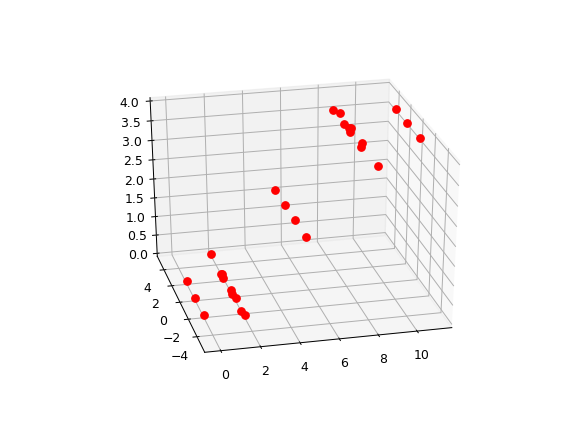

In [16]:
%matplotlib notebook
nodes = [Node(0., -2., 0.),  # N0
         Node(0., 0., 0.),  # N1
         Node(0., 2., 0.),  # N2
         Node(2.-0.1, -2., 0.),  # N3
         Node(2.-0.1, 0., 0.),  # N4
         Node(2.-0.1, 2., 0.),  # N5

         Node(2.-0.05, 2.51, 0.),  # 6
         Node(2.-0.05, 5., 0.),  # 7

         Node(2., 2.5, 0.),  # 8
         Node(2., .5, 0.),  # 9
         Node(2., -.5, 0.),  # 10
         Node(2., -2.5, 0.),  # 11

         Node(5., 3., 2.),  # 12
         Node(5., 1., 2.),  # 13
         Node(5., -1., 2.),  # 14
         Node(5., -3., 2.),  # 15

         Node(8.-0.1, 2.5, 4.),  # 16
         Node(8.-0.1, .5, 4.),  # 17
         Node(8.-0.1, -.5, 4.),  # 18
         Node(8.-0.1, -2.5, 4.),  # 19

         Node(8., 0., 4.),  # 20
         Node(8., -5., 4.),  # 21

         Node(8.+0.1, 2., 4.),  # 22
         Node(8.+0.1, 0., 4.),  # 23
         Node(8.+0.1, -2., 4.),  # 24

         Node(11., 2., 4.),  # 25
         Node(11., 0., 4.),  # 26
         Node(11., -2., 4.)]  # 27

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot([n.x for n in nodes],[n.y for n in nodes], 'or', zs=[n.z for n in nodes])

## Creating the channels (linking the nodes)

<IPython.core.display.Javascript object>


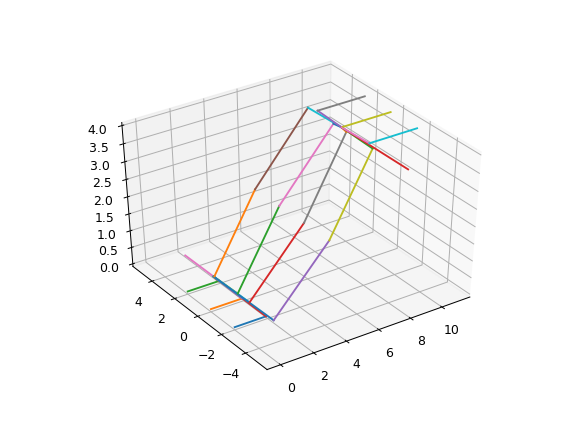

In [17]:
c = 1.e-10  # m^2/s, reference conductance !OBS, not the log, the conductance
BND_COND *= c  # too significant a gap creates cancellation error, stick to 10**6 factor difference
channels = {(0, 3): Channel(2. * c),
            (1, 4): Channel(8. * c),
            (2, 5): Channel(32. * c),
            (3, 6): Channel(BND_COND),
            (4, 6): Channel(BND_COND),
            (5, 6): Channel(BND_COND),

            (6, 7): Channel(BND_COND),
            (6, 8): Channel(BND_COND),
            (6, 9): Channel(BND_COND),
            (6, 10): Channel(BND_COND),
            (6, 11): Channel(BND_COND),

            (8, 12): Channel(4. * c),
            (9, 13): Channel(8. * c),
            (10, 14): Channel(16. * c),
            (11, 15): Channel(32. * c),
            (12, 16): Channel(4. * c),
            (13, 17): Channel(8. * c),
            (14, 18): Channel(16. * c),
            (15, 19): Channel(32. * c),

            (16, 20): Channel(BND_COND),
            (17, 20): Channel(BND_COND),
            (18, 20): Channel(BND_COND),
            (19, 20): Channel(BND_COND),

            (20, 21): Channel(BND_COND),
            (20, 22): Channel(BND_COND),
            (20, 23): Channel(BND_COND),
            (20, 24): Channel(BND_COND),
            (22, 25): Channel(100. * c),
            (23, 26): Channel(200. * c),
            (24, 27): Channel(300. * c),
            }

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for k, v in channels.items():
    ax.plot([nodes[k[0]].x, nodes[k[1]].x],
            [nodes[k[0]].y, nodes[k[1]].y], 
            zs=[nodes[k[0]].z, nodes[k[1]].z])

## Creating some flow boundary conditions

In [7]:
#  We assign 6 fixed head boundary conditions: 3 at the tunnel wall with essentially h=0m and 1 at each of the three
#  boreholes, all at essentially h=20m.
hbnds = {0: 0., 1: 0., 2: 0., 25: 20., 26: 20., 27: 20.}
#  We also assign two fixed flow boundary conditions, inflow at node 21 and inflow at node 7.
qbnds = {7: -1.5e-8, 21: 1.e-8}

## Building the network and solving the steady state flow equation

In [8]:
#  Now, we build the network with the specified nodes, channels and boundary conditions.
N = Network(nodes=nodes, channels=channels, hbnds=hbnds, qbnds=qbnds)

#  And then solve the steady state flow problem and export the data for visualization
N.solve_steady_state_flow_scipy_direct()
N.export2vtk('example3_flow_data')

## Defining channel geometry for transport

In [9]:
# Before running a transport simulation, we need to define some information about the geometry of the channels
N.set_channel_lengths()  # passing no argument defaults to the euclidean distance between the defined nodes
N.set_channel_widths(width=0.2)  # there is no default width, here we use 0.2m for all channels
N.set_channel_apertures()  # passing no arguments defaults to the hydraulic aperture based no the cubic law according to
                           # the conductance, length and width

## Creating a transport simulation
Now we create a solute transport simulation, specifying the injection nodes and the sampling nodes for the particles. We have to specify other parameters relative to the injection, i.e the number of injected particles, if the mass is injected uniformly or in a flux-weighted manner, and the injection profile in time (here set to instantaneous).

In [10]:
TS = TransportSimulation(N, injection_nodes=[25, 26, 27], sampling_nodes=[0, 1, 2], n_particles=10000,
                         spatial_injection_mode='flux', time_injection_mode='instantaneous')

recovery = TS.RMM.estimate_tracer_recovery()
print(recovery)

0.6283760745810861


## Defining the interaction model between the flowing channel and the adjacent intact rock

Depending on the transport/reaction processes taking place in the channels, we have to specify some additional params
Here we will use an channels with advection, diffusion/sorption into an infinitely thick adjacent rock matrix
The advective residence time is estimated from the flow solution and the channel geometry already defined.
Here we set no retardation on the surface of the channel, by setting R=1., but we consider diffusion/sorption inside
the rock matrix by setting MPG=2.e-8 (see Moreno and Crawford (2009))

In [11]:
TS.set_channel_matrix_models(channels='all', R=1., MPG=2.e-9)  # We set all the physical channels
TS.set_channel_matrix_models(channels={k for k, v in TS.channels.items() if v.conductance > 1.e-5}, R=0.)

## Running the particle-tracking (transport simulation)

In [12]:
TS.run_particle_tracking()

## Post-processing

<IPython.core.display.Javascript object>


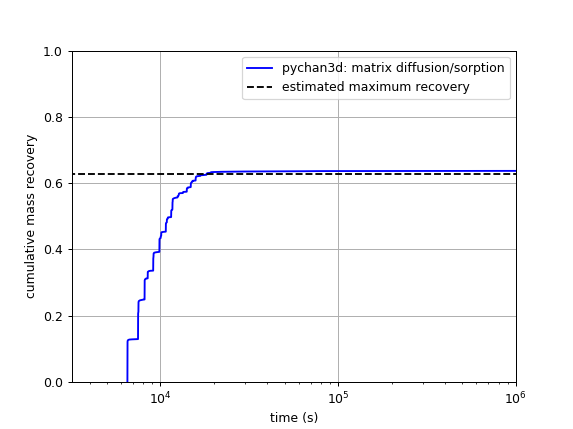

In [14]:
%matplotlib notebook
particles = []
for p in TS.particles:  # After the run, the transport simulation has a list of particles as a new attribute .particles,
                        # a particle is a custom python object with two main attributes:
                        #  .nodes (an array of visited nodes) and .times (the corresponding visiting times)
    if p.nodes[-1] != TS.orig2topo(7):  # we exclude the particles escaping through the neuwan outflow boundary
        particles.append(p)                 # to select only the particles that end up in the tunnel
times = np.array([p.times[-1] for p in particles])
sorted_times = np.sort(times)
CDF = (np.arange(times.shape[0])+1.)/float(len(TS.particles))#sorted times and CDF give an empirical cumulative recovery

# given that you have matplotlib installed you can easily produce 2d graphs of your results using simple scripts such as
plt.semilogx(sorted_times, CDF, 'b-', label='pychan3d: matrix diffusion/sorption')
plt.plot([1.e3, 1.e8], [recovery, recovery], 'k--', label='estimated maximum recovery')
plt.xlabel('time (s)')
plt.ylabel('cumulative mass recovery')
plt.legend(loc='upper right')
plt.grid(True)
plt.xlim(10**3.5, 1.e6)
plt.ylim(0., 1.)
#plt.savefig('example3_cumulative_recovery.pdf')
plt.show() # uncomment this line for interactive visualisation using matplotlib

# One can export snapshots in times of the interpolated particle positions,
# in this case 20 snapshots spread according to a log progression between 10**3 s and 10**6 s.
TS.export_particles2vtk('example3_particles', times=np.logspace(3, 6, num=20))